In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from helpers_tickers import (
    get_all_tickers_sp500,
    format_sp500_tickers,
    filter_out_tickers,
    download_tickers_data,
    delete_all_null_tickers,
    get_ticket_between_dates,
)

from helpers_allocation import (
    get_cumulative_returns,
    plot_stock,
    optimize_portfolio,
    discrete_allocation,
    get_cumulative_returns_portfolio,
)

plt.style.use("ggplot")
%matplotlib inline

In [2]:
def load_all_tickers_sp500(nb_years: int) -> pd.DataFrame:
    all_tickers_raw = get_all_tickers_sp500()
    all_tickers = format_sp500_tickers(all_tickers_raw)
    all_tickers_filtered = filter_out_tickers(all_tickers, nb_years)
    list_tickers = all_tickers_filtered.index.tolist()
    
    all_tickers_data = download_tickers_data(list_tickers, nb_years)
    all_tickers_data = delete_all_null_tickers(all_tickers_data)
    
    return all_tickers_data

In [3]:
df_tickers = load_all_tickers_sp500(20)

[*********************100%***********************]  212 of 212 completed

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted


In [4]:
df_tickers.head()

Adj Close                                             \
                             A      AAPL        ABT       ADBE        ADI   
Date                                                                        
2003-01-02 00:00:00  11.632268  0.224325  10.992253  12.759070  16.488079   
2003-01-03 00:00:00  11.577570  0.225840  11.099295  13.107951  16.558109   
2003-01-06 00:00:00  12.130617  0.225840  11.170657  13.711017  17.576672   
2003-01-07 00:00:00  12.021223  0.225083  10.668391  14.216135  17.659431   
2003-01-08 00:00:00  11.437786  0.220535  10.937365  13.528016  17.194708   

                                                                          ...  \
                          ADM        ADP      ADSK        AEE        AEP  ...   
Date                                                                      ...   
2003-01-02 00:00:00  7.876245  20.067945  7.227872  17.206068  12.046489  ...   
2003-01-03 00:00:00  7.926574  19.954315  7.024898  17.442091  12.290154  ...   
2003-01-06 00:00:00  7.939157  20.008667  7.227872  18.186817  13.038245  ...   
2003-01-07 00:00:00  7.825921  19.820936  7.539760  17.560106  12.811682  ...   
2003-01-08 00:00:00  7.769300  19.652958  7.460550  17.592670  12.734735  ...   

                      Volume                                                \
                         WAT      WBA      WFC       WMB      WMT      XEL   
Date                                                                         
2003-01-02 00:00:00  1122200  4933500  9904200  10862488  7545500  1780400   
2003-01-03 00:00:00  1173000  6986100  7808000   4369725  8389300  1796200   
2003-01-06 00:00:00   617300  4801400  8097400   3375368  7438400  2773100   
2003-01-07 00:00:00  1220000  5875600  6556200   9427748  6669000  1803400   
2003-01-08 00:00:00   702800  4007200  8071000  14393032  7796900  3373300   

                                                         
                          XOM      YUM      ZBH    ZION  
Date                                                     
2003-01-02 00:00:00  12798800  3378461  1762845  794400  
2003-01-03 00:00:00   9221900  3241308  1059870  602300  
2003-01-06 00:00:00  11925100  2842926   841510  684000  
2003-01-07 00:00:00  14600300  4670978   644574  560000  
2003-01-08 00:00:00  12677600  3513944   598018  950200  

[5 rows x 1248 columns]

In [5]:
sp500_market = download_tickers_data(['^GSPC'], 20)

[*********************100%***********************]  1 of 1 completed


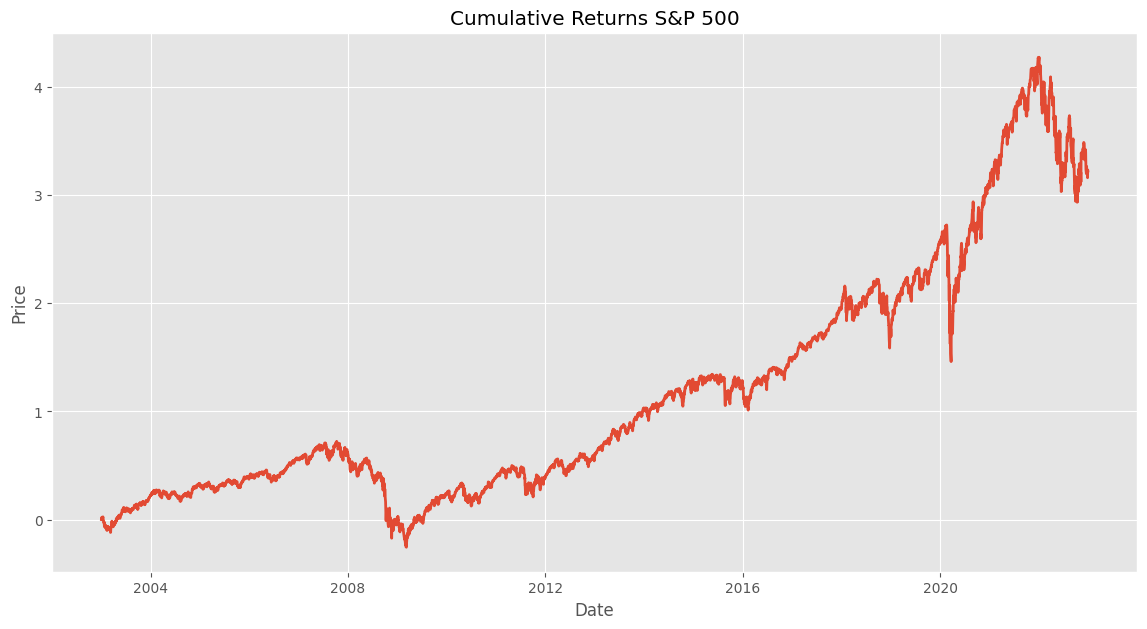

In [6]:
cumu_sp500_market = get_cumulative_returns(sp500_market['Close'])
plot_stock(cumu_sp500_market, 'Cumulative Returns S&P 500')

In [7]:
tickers_dates = get_ticket_between_dates(df_tickers, "2010", "2020")

In [31]:
allocation = optimize_portfolio(tickers_dates["Close"], 0.01)
allocation

{'AAPL': 0.082,
 'AZO': 0.165,
 'COST': 0.019,
 'CTAS': 0.114,
 'FI': 0.119,
 'HD': 0.019,
 'HSY': 0.041,
 'LMT': 0.02,
 'NEE': 0.122,
 'NOC': 0.01,
 'SHW': 0.126,
 'SPGI': 0.018,
 'TJX': 0.033,
 'UNH': 0.109}

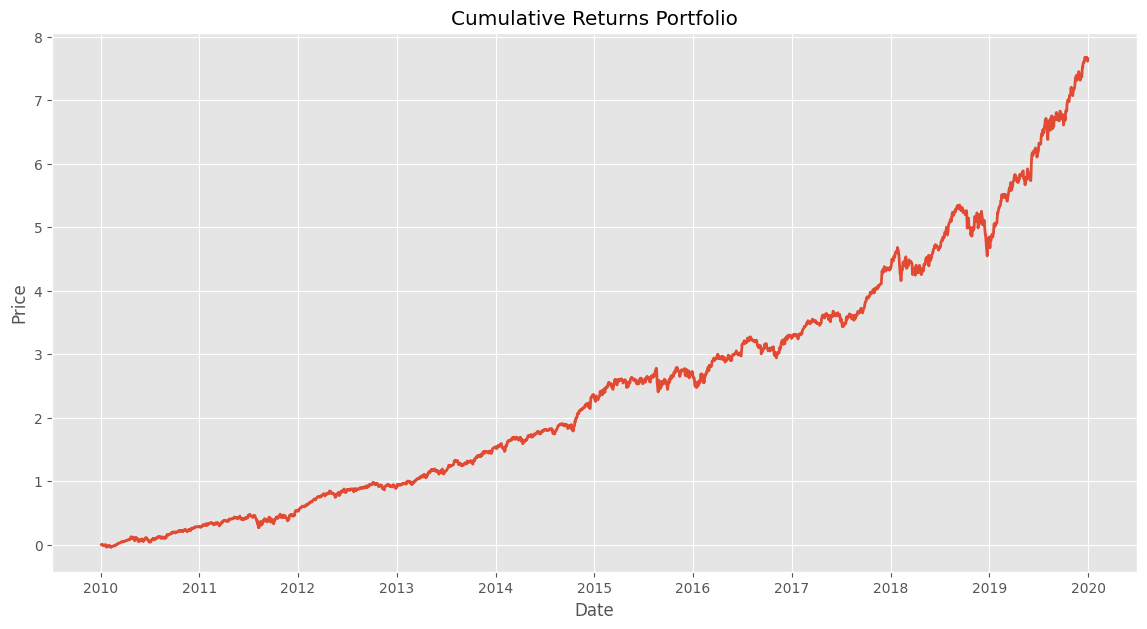

In [13]:
cum_returns_port = get_cumulative_returns_portfolio(tickers_dates["Close"], allocation)
plot_stock(cum_returns_port, 'Cumulative Returns Portfolio')

In [14]:
discrete_allocation(tickers_dates["Close"], allocation, 10000)

({'AZO': 2,
  'NEE': 25,
  'SHW': 7,
  'FI': 11,
  'CTAS': 5,
  'UNH': 3,
  'AAPL': 11,
  'HSY': 2,
  'TJX': 2},
 19.399093627929688)

In [35]:
def sell_all_stocks(df_tickers: pd.DataFrame, allocation: dict) -> float:
    total = 0
    
    for ticker, shares in allocation.items():
        total += df_tickers[ticker].iloc[-1] * shares
    
    return total

In [ ]:
def portfolio_values(df_tickers: pd.DataFrame, allocation: dict) -> pd.DataFrame:
    df_assets = df_tickers[allocation.keys()]
    df_weights = allocation.values()
    portfolio = df_assets.mul(df_weights, axis=1).sum(axis=1)
    
    return portfolio

In [83]:
def calculate_each_year_allocation(df_tickers: pd.DataFrame, nb_year_look_back: int) -> pd.DataFrame:
    df_tickers_close = df_tickers["Close"]
    
    first_year = df_tickers_close.index[0].year
    first_year_calculation = first_year + nb_year_look_back
    last_year = df_tickers_close.index[-1].year
    
    money = 10000
    dis_allocation = {}
    
    money_values = []
    df_money = pd.DataFrame()
    
    for i in range(first_year_calculation, last_year + 1):
        if dis_allocation != {}:
            df_porforlio_value = portfolio_values(get_ticket_between_dates(df_tickers_close, 
                                                                           str(i), str(i + 1)), 
                                                  dis_allocation)
            print(money)
            df_porforlio_value += money
    
            df_money = pd.concat([df_money, df_porforlio_value], axis=0)
        
        df_year = get_ticket_between_dates(df_tickers_close, str(i - nb_year_look_back), str(i + 1))
        money += sell_all_stocks(df_year, dis_allocation)
        money_values.append(money)
        
        print(f"Money: {money}")
        print("Fist_date: ", df_year.index[0], "Last_date: ", df_year.index[-1])
        allocation = optimize_portfolio(df_year, 0.1)
        dis_allocation, money = discrete_allocation(df_year, allocation, money)        
        
        print("Allocation: ", allocation)
        print("-------------------")
    
    money += sell_all_stocks(df_tickers_close, dis_allocation) 
    print(f"Money: {money}")
    return money_values, df_money

In [84]:
money_value, df_money = calculate_each_year_allocation(df_tickers, 4)

Money: 10000
Fist_date:  2003-01-02 00:00:00 Last_date:  2007-12-31 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'AAPL': 0.218, 'ADM': 0.037, 'ADSK': 0.06, 'AES': 0.05, 'BDX': 0.012, 'CI': 0.038, 'CMI': 0.068, 'CVS': 0.029, 'EIX': 0.051, 'ELV': 0.017, 'GLW': 0.015, 'HES': 0.024, 'L': 0.015, 'MCD': 0.057, 'MRO': 0.023, 'OXY': 0.03, 'PPL': 0.013, 'UNH': 0.02, 'VLO': 0.069, 'WAT': 0.025, 'WMB': 0.093, 'YUM': 0.014}
-------------------
7.011575698852539
Money: 5033.423267364502
Fist_date:  2004-01-02 00:00:00 Last_date:  2008-12-31 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'AAPL': 0.464, 'AON': 0.068, 'BAX': 0.064, 'BDX': 0.021, 'EOG': 0.056, 'HES': 0.029, 'MCD': 0.22, 'OXY': 0.024, 'TAP': 0.047}
-------------------
18.8782958984375
Money: 8633.012276649475
Fist_date:  2005-01-03 00:00:00 Last_date:  2009-12-31 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'AAPL': 0.486, 'BAX': 0.055, 'CL': 0.025, 'COR': 0.062, 'CSX': 0.026, 'EOG': 0.05, 'HPQ': 0.089, 'MCD': 0.101, 'MCK': 0.069, 'OXY': 0.028}
-------------------
5.288987159729004
Money: 11189.001466274261
Fist_date:  2006-01-03 00:00:00 Last_date:  2010-12-31 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'AAPL': 0.283, 'AZO': 0.241, 'CMI': 0.143, 'HAS': 0.072, 'MCD': 0.19, 'ORCL': 0.048, 'WAT': 0.022}
-------------------
5.141297817230225
Money: 12462.059910297394
Fist_date:  2007-01-03 00:00:00 Last_date:  2011-12-30 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'AAPL': 0.397, 'AZO': 0.207, 'GWW': 0.155, 'MCD': 0.199, 'TJX': 0.041}
-------------------
18.96404504776001
Money: 14262.630239963531
Fist_date:  2008-01-02 00:00:00 Last_date:  2012-12-31 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'AAPL': 0.119, 'AMGN': 0.03, 'AZO': 0.268, 'COR': 0.068, 'GWW': 0.074, 'HSY': 0.064, 'SBUX': 0.041, 'SHW': 0.147, 'TJX': 0.191}
-------------------
9.841570377349854
Money: 19057.215401172638
Fist_date:  2009-01-02 00:00:00 Last_date:  2013-12-31 00:00:00
Allocation:  {'AAPL': 0.136, 'AZO': 0.1, 'BBWI': 0.013, 'CI': 0.024, 'CMS': 0.024, 'COR': 0.093, 'F': 0.041, 'HSY': 0.058, 'MCK': 0.098, 'MO': 0.062, 'NI': 0.014, 'PPG': 0.012, 'SBUX': 0.121, 'TJX': 0.15, 'VFC': 0.04}
-------------------
6.114878177642822
Money: 23013.862881183624
Fist_date:  2010-01-04 00:00:00 Last_date:  2014-12-31 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'AAPL': 0.055, 'AMGN': 0.018, 'AZO': 0.122, 'BBWI': 0.034, 'CMCSA': 0.026, 'COR': 0.059, 'CVS': 0.025, 'HD': 0.049, 'HSY': 0.071, 'KR': 0.065, 'LMT': 0.015, 'LUV': 0.029, 'MCK': 0.042, 'MO': 0.04, 'NI': 0.023, 'PPG': 0.018, 'SBUX': 0.012, 'SHW': 0.089, 'TJX': 0.059, 'UNH': 0.032, 'UNP': 0.028, 'VFC': 0.053}
-------------------
13.921885013580322
Money: 24395.224123477936
Fist_date:  2011-01-03 00:00:00 Last_date:  2015-12-31 00:00:00


/usr/local/lib/python3.10/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'AMGN': 0.015, 'AZO': 0.063, 'BBWI': 0.012, 'BMY': 0.017, 'CI': 0.059, 'CLX': 0.013, 'COR': 0.058, 'CTAS': 0.037, 'CVS': 0.027, 'EA': 0.033, 'EFX': 0.022, 'FI': 0.026, 'HD': 0.072, 'KMB': 0.015, 'KR': 0.108, 'LLY': 0.016, 'LMT': 0.066, 'LOW': 0.012, 'LUV': 0.018, 'MCK': 0.015, 'MCO': 0.013, 'MO': 0.035, 'NI': 0.044, 'NKE': 0.013, 'NOC': 0.036, 'SBUX': 0.039, 'SHW': 0.036, 'TJX': 0.048, 'UNH': 0.02, 'VFC': 0.01}
-------------------
21.796017169952393
Money: 24413.88477373123
Fist_date:  2012-01-03 00:00:00 Last_date:  2016-12-30 00:00:00
Allocation:  {'ADBE': 0.024, 'ALL': 0.032, 'AZO': 0.026, 'BSX': 0.047, 'CI': 0.038, 'CMCSA': 0.021, 'CTAS': 0.052, 'EA': 0.021, 'EFX': 0.025, 'FI': 0.053, 'HD': 0.043, 'KR': 0.041, 'LMT': 0.054, 'LUV': 0.101, 'MO': 0.034, 'NEE': 0.017, 'NI': 0.028, 'NOC': 0.084, 'NVDA': 0.112, 'SHW': 0.023, 'SNA': 0.025, 'UNH': 0.034, 'VLO': 0.015}
-------------------
236.58986520767212
Money: 32224.67985200882
Fist_date:  2013-01-02 00:00:00 Last_date:  2

/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'ADBE': 0.036, 'ALL': 0.018, 'AVY': 0.011, 'BA': 0.037, 'BBY': 0.056, 'BDX': 0.017, 'BSX': 0.039, 'CI': 0.041, 'CLX': 0.01, 'CTAS': 0.05, 'EA': 0.08, 'ELV': 0.029, 'FI': 0.013, 'HD': 0.024, 'LMT': 0.057, 'LUV': 0.076, 'MO': 0.014, 'NEE': 0.023, 'NI': 0.028, 'NOC': 0.081, 'NVDA': 0.153, 'PGR': 0.019, 'SYK': 0.011, 'UNH': 0.051}
-------------------
11.045307636260986
Money: 29259.933582782745
Fist_date:  2014-01-02 00:00:00 Last_date:  2018-12-31 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'ADBE': 0.065, 'AEE': 0.019, 'AZO': 0.012, 'BSX': 0.043, 'CLX': 0.01, 'CMS': 0.037, 'CTAS': 0.066, 'DRI': 0.029, 'EA': 0.058, 'ELV': 0.061, 'FI': 0.038, 'LLY': 0.039, 'LUV': 0.016, 'MCD': 0.022, 'MSFT': 0.011, 'NEE': 0.055, 'NEM': 0.011, 'NI': 0.035, 'NOC': 0.016, 'NVDA': 0.156, 'PGR': 0.035, 'UNH': 0.099, 'XEL': 0.027}
-------------------
4.378183841705322
Money: 40106.76835107803
Fist_date:  2015-01-02 00:00:00 Last_date:  2019-12-31 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'ADBE': 0.07, 'AON': 0.015, 'AVY': 0.02, 'AZO': 0.019, 'BSX': 0.046, 'CMS': 0.024, 'COST': 0.011, 'CTAS': 0.077, 'DHR': 0.011, 'DRI': 0.019, 'ELV': 0.014, 'FI': 0.067, 'MCD': 0.039, 'MSFT': 0.021, 'MSI': 0.02, 'NEE': 0.076, 'NEM': 0.059, 'NOC': 0.023, 'NVDA': 0.16, 'PGR': 0.05, 'SPGI': 0.036, 'SYY': 0.035, 'UNH': 0.056, 'XEL': 0.021}
-------------------
9.391722202301025
Money: 53946.009726047516
Fist_date:  2016-01-04 00:00:00 Last_date:  2020-12-31 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'AAPL': 0.088, 'ADBE': 0.08, 'ADSK': 0.023, 'COST': 0.014, 'CSX': 0.018, 'CTAS': 0.067, 'DE': 0.034, 'DHR': 0.062, 'NEE': 0.089, 'NEM': 0.131, 'NVDA': 0.251, 'PGR': 0.086, 'WMT': 0.046}
-------------------
3.325277805328369
Money: 78268.0885682106
Fist_date:  2017-01-03 00:00:00 Last_date:  2021-12-31 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'AAPL': 0.104, 'ABT': 0.027, 'ADBE': 0.027, 'AON': 0.013, 'AZO': 0.011, 'COST': 0.094, 'DHR': 0.094, 'INTU': 0.053, 'LLY': 0.09, 'MSFT': 0.061, 'MSI': 0.016, 'NEE': 0.061, 'NEM': 0.015, 'NVDA': 0.122, 'PGR': 0.024, 'RVTY': 0.04, 'SHW': 0.055, 'SPGI': 0.042, 'TGT': 0.042}
-------------------
40.27012872695923
Money: 61876.64532327652
Fist_date:  2018-01-02 00:00:00 Last_date:  2022-12-30 00:00:00


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Allocation:  {'AAPL': 0.05, 'ADM': 0.02, 'AES': 0.023, 'AON': 0.028, 'AZO': 0.174, 'COST': 0.064, 'CTAS': 0.032, 'DE': 0.037, 'DHR': 0.094, 'HES': 0.022, 'HSY': 0.029, 'KLAC': 0.018, 'LLY': 0.264, 'MCK': 0.015, 'MRK': 0.016, 'MSI': 0.069, 'PGR': 0.039}
-------------------
Money: 61876.64532327652


In [87]:
def compare_porfolio_to_market(portfolio: pd.DataFrame, market: pd.DataFrame) -> pd.DataFrame:
    first_date = portfolio.index[0]
    last_date = portfolio.index[-1]
    
    df = pd.concat([portfolio, market.loc[first_date:last_date]], axis=1)
    cum_returns = get_cumulative_returns(df)

    plot_stock(cum_returns, 'Cumulative Returns Portfolio vs Market')

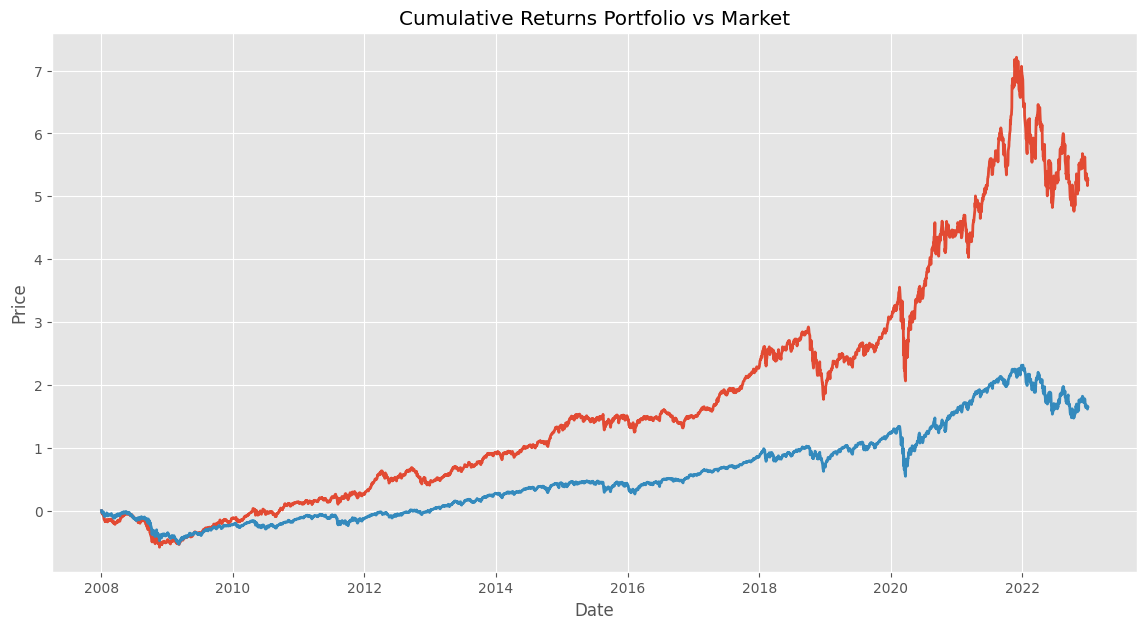

In [89]:
compare_porfolio_to_market(df_money, sp500_market["Close"])